# Boston Housing Price Prediction

## Introduction
Ce projet vise à développer un modèle de Machine Learning pour prédire les prix des maisons à Boston en fonction de plusieurs paramètres socio-économiques et environnementaux.

## Données
Le jeu de données utilisé est le **Boston Housing Dataset**, qui comprend diverses caractéristiques des quartiers de Boston telles que :
- Taux de criminalité (CRIM)
- Proportion de terrains résidentiels (ZN)
- Nombre moyen de pièces par logement (RM)
- Proximité de la rivière Charles (CHAS)
- Niveau d'oxyde nitrique (NOX)
- Âge des bâtiments (AGE)
- Distance aux centres d'emploi (DIS)
- Taux d'imposition foncière (TAX)
- Ratio élèves/enseignants (PTRATIO)
- Et d'autres variables socio-économiques

## Prétraitement des données
Les étapes suivantes ont été réalisées :
- Chargement et exploration des données (vérification des valeurs manquantes et des doublons)
- Analyse des distributions des variables
- Normalisation et standardisation des données si nécessaire

## Modélisation
Deux modèles de Machine Learning ont été testés :
- **Random Forest Regressor**, un ensemble d'arbres de décision robuste aux données bruitées.
- **XGBoost Regressor**, un algorithme basé sur le gradient boosting, optimisé pour de meilleures performances.

Le meilleur modèle a été enregistré sous le fichier `model.pkl`.

## Interface Web (Flask)
Une interface utilisateur a été développée avec Flask pour permettre la prédiction interactive des prix des maisons.
Pour exécuter l'application :

```bash
python app.py
```

L'application s'exécutera sur [http://127.0.0.1:5000](http://127.0.0.1:5000).

## Conclusion
Ce projet illustre comment différents modèles de Machine Learning peuvent être utilisés pour prédire les prix immobiliers en fonction de diverses caractéristiques du marché. L'utilisation de techniques avancées comme **XGBoost** permet d'améliorer la précision des prédictions.



In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exploratory Data Analysis (EDA)

In [83]:
# Chargement du dataset
Boston = pd.read_csv('C:/Users/momol/Downloads/BostonHousingProject/BostonHousing.csv')

In [84]:
# Aperçu du dataset
Boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [85]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [86]:
# Vérification des valeurs manquantes et des doublons
print(f"Doublons: {Boston.duplicated().sum()}")
print(Boston.isnull().sum())

Doublons: 0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [87]:
# Nettoyage des données: remplissgae des valeurs manquantes
Boston['rm'] = Boston['rm'].fillna(method='ffill').fillna(method='bfill')
Boston['chas'] = Boston['chas'].astype(int)

In [88]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [89]:
# Suppression des doublons
Boston.drop_duplicates(inplace=True)
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283385,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702842,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [90]:
# Arrondi des valeurs de la colonne 'age'
Boston["age"] = Boston["age"].round().astype(int)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,79,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,46,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2


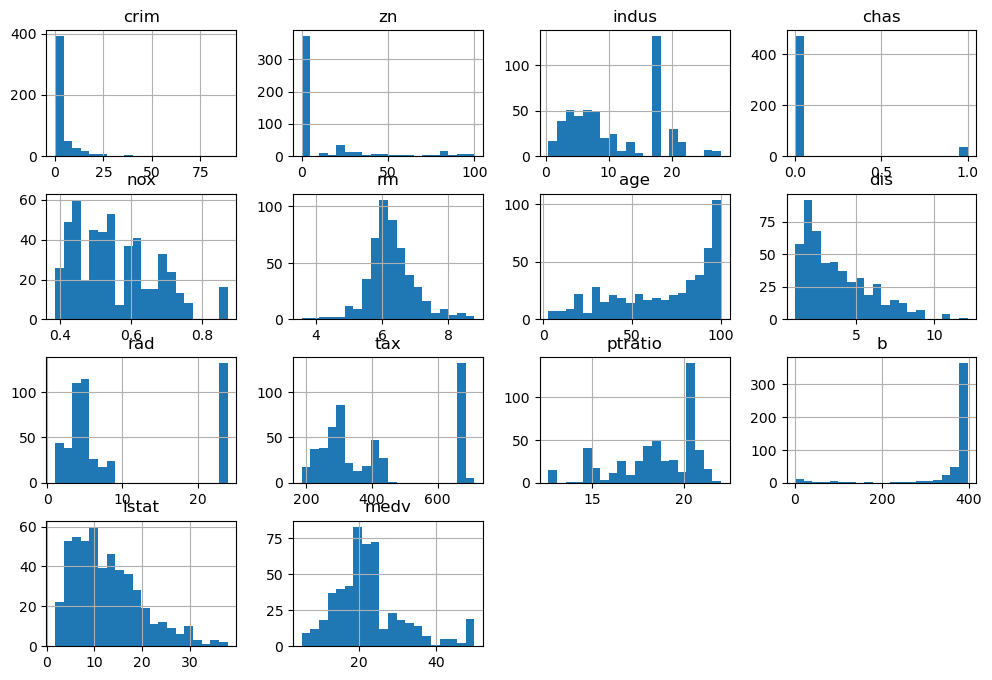

In [91]:
# Visualisation des distributions
Boston.hist(figsize=(12, 8), bins = 20)
plt.show()

In [92]:
Q1 = Boston["crim"].quantile(0.25)
Q3 = Boston["crim"].quantile(0.75)
IQR = Q3 - Q1
outliers = Boston[(Boston["crim"] < (Q1 - 1.5 * IQR)) | (Boston["crim"] > (Q3 + 1.5 * IQR))]
print(outliers)

        crim   zn  indus  chas    nox     rm  age     dis  rad  tax  ptratio  \
367  13.5222  0.0   18.1     0  0.631  3.863  100  1.5106   24  666     20.2   
371   9.2323  0.0   18.1     0  0.631  6.216  100  1.1691   24  666     20.2   
373  11.1081  0.0   18.1     0  0.668  4.906  100  1.1742   24  666     20.2   
374  18.4982  0.0   18.1     0  0.668  4.138  100  1.1370   24  666     20.2   
375  19.6091  0.0   18.1     0  0.671  7.313   98  1.3163   24  666     20.2   
..       ...  ...    ...   ...    ...    ...  ...     ...  ...  ...      ...   
468  15.5757  0.0   18.1     0  0.580  5.926   71  2.9084   24  666     20.2   
469  13.0751  0.0   18.1     0  0.580  5.713   57  2.8237   24  666     20.2   
477  15.0234  0.0   18.1     0  0.614  5.304   97  2.1007   24  666     20.2   
478  10.2330  0.0   18.1     0  0.614  6.185   97  2.1705   24  666     20.2   
479  14.3337  0.0   18.1     0  0.614  6.229   88  1.9512   24  666     20.2   

          b  lstat  medv  
367  131.42 

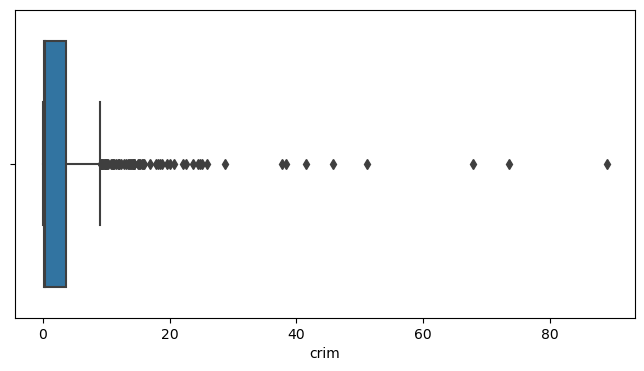

In [93]:
# Visualisation des valeurs aberrantes
plt.figure(figsize=(8,4))
sns.boxplot(x=Boston["crim"])
plt.show()

In [94]:
# Remplacement des valeurs aberrantes par la médiane
median_crim = Boston["crim"].median()
Boston["crim"] = Boston["crim"].apply(lambda x: median_crim if x > (Q3 + 1.5 * IQR) else x)

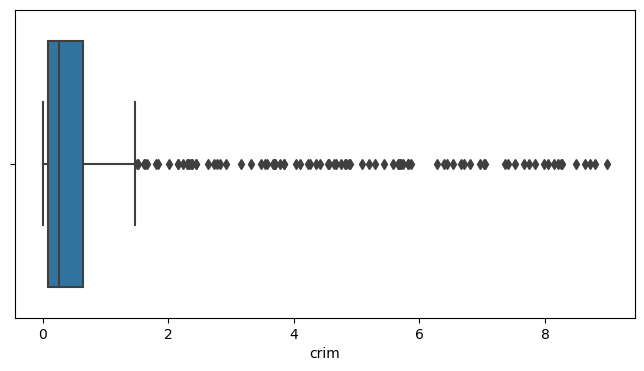

In [95]:
# Nouvelle visualisation après traitement
plt.figure(figsize=(8,4))
sns.boxplot(x=Boston["crim"])
plt.show()

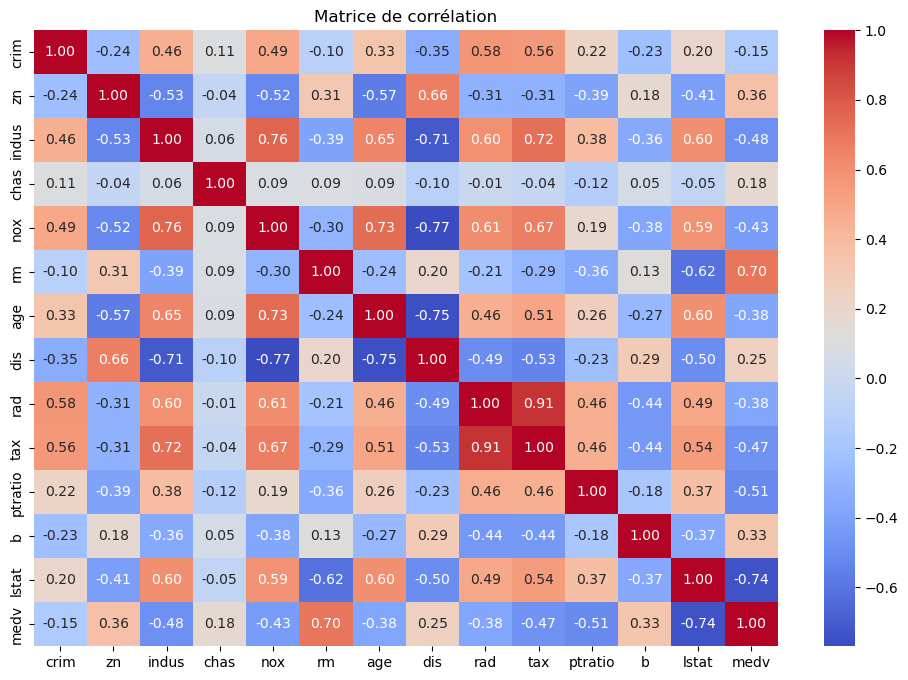

In [96]:
# Matrice de corrélation
corr_matrix = Boston.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [97]:
# Suppression de la colonne 'rad' pour éviter la multicolinéarité
Boston.drop("rad", axis=1, inplace=True)

In [98]:
# multiplier medv par 1000
Boston["medv"] = Boston["medv"] * 1000

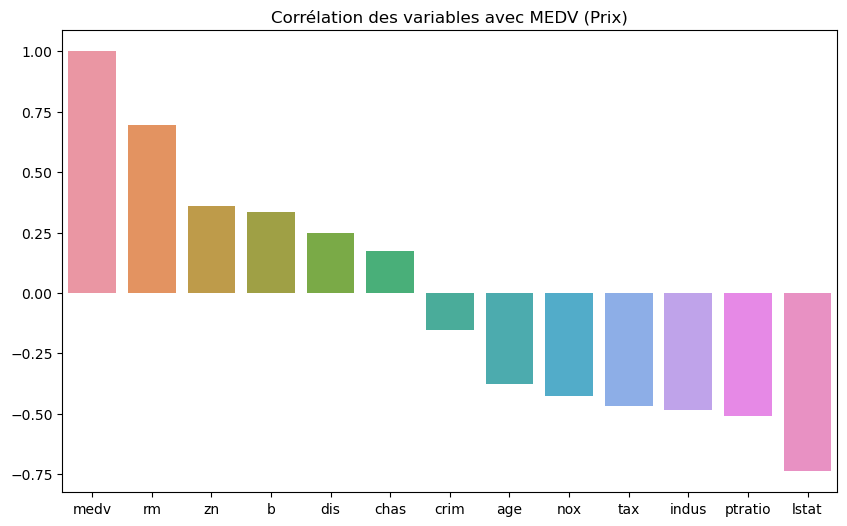

In [99]:
# Analyse de la corrélation avec la variable cible 'medv' le prix des maisons
corr_matrix_1 = Boston.corr()
top_corr_features = corr_matrix_1["medv"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.index, y=top_corr_features.values)
plt.title("Corrélation des variables avec MEDV (Prix)")
plt.show()

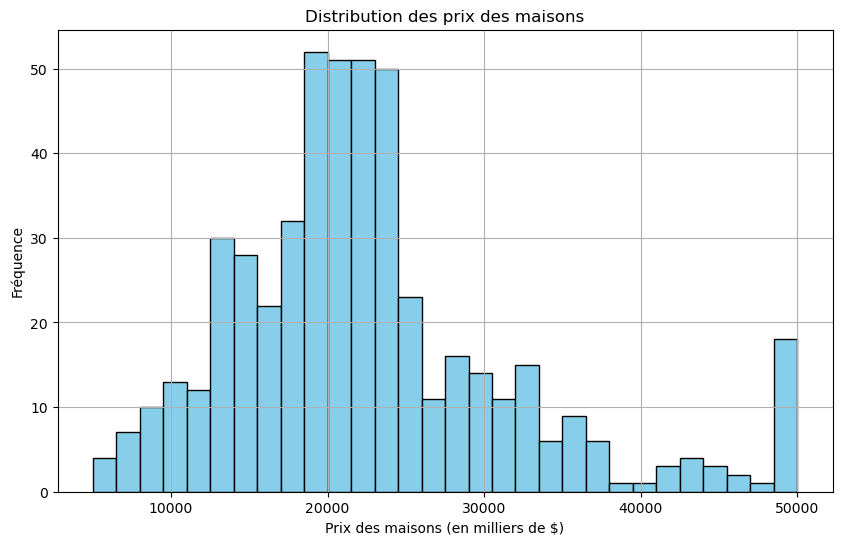

In [100]:
# Histogramme des prix des maisons
plt.figure(figsize=(10, 6))
plt.hist(Boston['medv'], bins=30, color='skyblue', edgecolor='black')  # medv représente les prix des maisons
plt.title('Distribution des prix des maisons')
plt.xlabel('Prix des maisons (en milliers de $)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

## Modeling

In [101]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Boston.drop("medv", axis=1))

In [102]:
# Séparation des données en données d'entraînement et de test
from sklearn.model_selection import train_test_split

X= Boston.drop("medv", axis=1)
y = Boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Taille du train : {X_train.shape},, Taille du test : {X_test.shape}")

Taille du train : (404, 12),, Taille du test : (102, 12)


In [103]:
# Modélisation avec la régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [104]:
# Evaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.2f}")

MAE : 3379.14
MSE : 26539039.43
RMSE : 5151.61
R2 : 0.64


In [105]:
# Modélisation avec XGBoost
!pip install xgboost
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective':'reg:squarederror',
    'eval_metric':'rmse',
    'learning_rate':0.1,
    'max_depth':5,
    'n_estimators':100
}

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [108]:
# Evaluation du modèle XGBoost
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.2f}")

MAE : 1929.48
MSE : 8160649.39
RMSE : 2856.69
R2 : 0.89


In [107]:
# Sauvegarde du modèle
import joblib
joblib.dump(model, "model.pkl")
print("Modèle enregistré !")

Modèle enregistré !


## Analyse du modèle

### Performance du modèle
Les scores de performance indiquent une bonne capacité prédictive du modèle. La régression linéaire atteint un R² de {r2:.2f}, tandis que le modèle XGBoost affiche une meilleure performance avec un R² de {r2:.2f}. 

### Courbes d'apprentissage
L'analyse des courbes d'apprentissage montre que le modèle présente un écart entre l'erreur d'entraînement et de validation, ce qui suggère une certaine variance. 

### Importance des caractéristiques
L'analyse des importances montre que des variables comme 'rm' (nombre moyen de pièces) et 'lstat' (pourcentage de la population à faible revenu) sont des prédicteurs significatifs du prix des maisons (medv). L'influence de certaines autres variables varie en fonction des catégories analysées.
